In [180]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [181]:
grids = np.loadtxt('grids.dat', delimiter=',')
(xmin,xmax,a,sz)=grids[0,:]
(tmin,tmax,tau,tsz)=grids[1,:]
(hbar,m,omega,Tmax)=grids[2,:]
tsz=int(tsz)
scaleFactor=2000
x = np.arange(xmin, xmax, step=a)
t = np.arange(tmin, tmax, step=tau)
psi_r = np.loadtxt('wf_real.dat', delimiter=',')
psi_i = np.loadtxt('wf_imag.dat', delimiter=',')

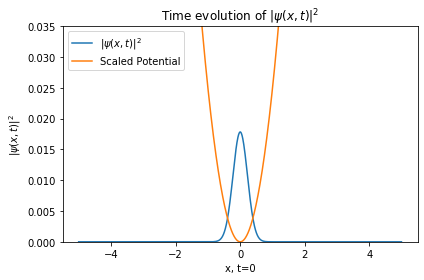

In [182]:
fig, ax = plt.subplots()
fig.set_tight_layout(True)
line, = ax.plot(x,(psi_r[:,0]**2+psi_i[:,0]**2), label='$|\psi (x,t)|^2$')
line2, = ax.plot(x, 0.5*omega**2*m*x**2/scaleFactor, label='Scaled Potential')
ax.set_ylim(0,0.035)
ax.set_xlabel('x, t=0')
ax.set_ylabel('$|\psi (x,t)|^2$')
ax.set_title('Time evolution of $|\psi (x,t)|^2$')
plt.legend(loc=2)
def update(i):
    normsq = psi_r[:,i]**2+psi_i[:,i]**2
    line.set_ydata(normsq)
    line2.set_ydata(0.5*omega**2*m*(x-i*tau/Tmax)**2/scaleFactor)
    ax.set_xlabel('x, t='+str(i*tau)[0:4])
    return line, ax

In [183]:
anim = FuncAnimation(fig, update, frames=np.arange(0, tsz), interval=50)
anim.save('sq_wave.gif', dpi=80, writer='imagemagick')

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [184]:
def compute_avg():
    mu = np.zeros(tsz)
    for i in range(tsz):
        mu[i] = np.sum(x*(psi_r[:,i]**2+psi_i[:,i]**2))
    return mu
def compute_var(mu):
    var = np.zeros(tsz)
    for i in range(tsz):
        var[i] = np.sum(x**2*(psi_r[:,i]**2+psi_i[:,i]**2))-mu[i]**2
    return var

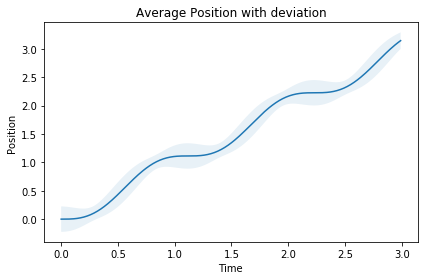

In [185]:
fig, ax = plt.subplots()
fig.set_tight_layout(True)
mu=compute_avg()
var=compute_var(mu)
lower = mu - 1*np.sqrt(var)
upper = mu + 1*np.sqrt(var)
ax.plot(t,mu)
ax.fill_between(t, lower, upper, alpha=.1)
ax.set_xlabel('Time')
ax.set_ylabel('Position')
ax.set_title('Average Position with deviation')
plt.savefig('avgdev.png')
plt.show()

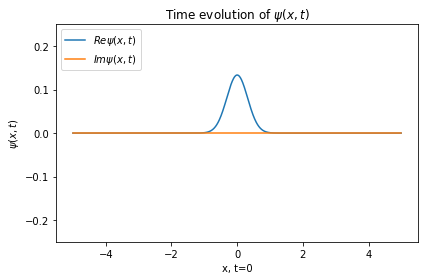

In [186]:
fig, ax = plt.subplots()
fig.set_tight_layout(True)
liner, = ax.plot(x,psi_r[:,0], label='$Re \psi (x,t) $')
linei, = ax.plot(x,psi_i[:,0], label='$Im \psi (x,t) $')
ax.set_ylim(-0.25,0.25)
ax.set_xlabel('x, t=0')
ax.set_ylabel('$\psi (x,t)$')
ax.set_title('Time evolution of $\psi (x,t)$')
plt.legend(loc=2)
def update_ri(i):
    liner.set_ydata(psi_r[:,i])
    linei.set_ydata(psi_i[:,i])
    ax.set_xlabel('x, t='+str(i*tau)[0:4])
    return liner, ax

In [187]:
anim = FuncAnimation(fig, update_ri, frames=np.arange(0, tsz), interval=50)
anim.save('wave.gif', dpi=80, writer='imagemagick')

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [199]:
def save_instants_sq(inst):
    fig, ax = plt.subplots()
    fig.set_tight_layout(True)
    for i in inst:
        ax.plot(x,(psi_r[:,i]**2+psi_i[:,i]**2), label='$|\psi (x,t)|^2$, t='+str(i*tau)[0:4])
    ax.set_xlabel('x, t')
    ax.set_ylabel('$|\psi (x,t)|^2$')
    ax.set_title('Time evolution of $|\psi (x,t)|^2$')
    plt.legend()
    plt.savefig('sqwave.png')

In [200]:
def save_instant(i):
    fig, ax = plt.subplots()
    fig.set_tight_layout(True)
    ax.plot(x,psi_r[:,i], label='$Re \psi (x,t)$')
    ax.plot(x,psi_i[:,i], label='$Im \psi (x,t)$')
    ax.set_xlabel('x, t='+str(i*tau)[0:4])
    ax.set_ylabel('$\psi (x,t)$')
    ax.set_title('Time evolution of $\psi (x,t)$')
    plt.savefig('wave'+str(i)+'.png')

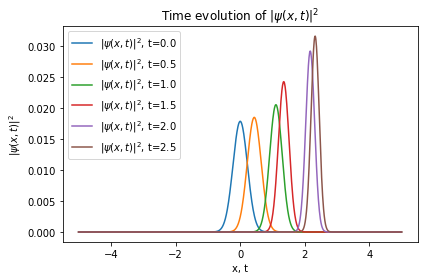

In [202]:
save_instants_sq([0,50,100,150,200, 250])